# 보스턴 주택 가격 데이터세트(Boston Housing Dataset)

+ 1978년 미국 보스턴 지역의 주택 가격으로, 506개 타운의 주택 가격 중앙값을 1000 달러 단위로 나타냄
+ 범죄율 주택당 방 개수 고속도로까지의 거리 등 13개 데이타를 이용하여 주택 가격을 예측한다.

+ 훈련 데이타 : 404개
+ 테스트 데이타 : 102개
+ 검증 데이타 : 훈련 데이타의 일부를 사용

+ 훈련 : 검증 : 테스트 = 60% : 20% : 20%


    [ 보스턴 주택 가격 데이터 세트의 데이터 설명 ]

<table>
    <tr><th>속성</th><th>설명</th></tr>
    <tr><td>CRIM</td><td>범죄율</td></tr>
    <tr><td>ZN</td><td>25000 평방피트당 주거지역의 비율</td></tr>
    <tr><td>INDUS</td><td>비소매 상업지구 비율 (단위:에이커)</td></tr>
    <tr><td>CHAS</td><td>찰스강에 인접하면 1, 그렇지 않으면 0</td></tr>
    <tr><td>NOX</td><td>일산화질소 농도(단위: 0.1ppm)</td></tr>
    <tr><td>RM</td><td>주택당 방의 수</td></tr>
    <tr><td>AGE</td><td>1940년 이전에 건설된 주택의 비율</td></tr>
    <tr><td>DIS</td><td>5개의 보스턴 직업고용센터와의 거리 (가중평균)</td></tr>
    <tr><td>RAD</td><td>고속도로 접근성</td></tr>
    <tr><td>TAX</td><td>재산세율</td></tr>
    <tr><td>PTRATIO</td><td>학생교사비율</td></tr>
    <tr><td>B</td><td>흑인비율</td></tr>
    <tr><td>LSTAT</td><td>하위계층비율</td></tr>
    <tr><td>MEDV</td><td>타운의 주택 가격 중앙값 (단위:1000달러)</td></tr>
<table>    

In [96]:
# pip install tensorflow

###  (1) 데이터 불러오기

In [72]:
#  (1) 데이터 불러오기
import tensorflow as tf
from tensorflow.keras.datasets import boston_housing
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()

print(len(train_X), len(test_X))
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


[ 결과 ]

+ 각 데이타의 단위가 다르다
+ 이에 전처리를 해서 정규화(Standardization)을 해야 학습 효율이 좋다

---

#### [참고] 데이타 정규화

    - 각 데이타에서 평균값을 뺀 다음 표준편차로 나눈다.
    - 지금은 훈련데이타와 테스트 데이타를 모두 알고 있지만,
        실제로 테스트 데이타는 데이타 학습을 마친 후 실전에서 만나는 데이타로 어떤 분포인지 모른다.
        그래서 훈련데이타의 평균과 표준편차로 데이트 데이타를 정규화한다. 
        
[참고] [정규화(Normalization)](http://hleecaster.com/ml-normalization-concept/)        

In [74]:
# (1-2) 데이터 전처리(정규화)
x_mean = train_X.mean()
x_std = train_X.std()
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

y_mean = train_Y.mean()
y_std = train_Y.std()
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


## (2) 회귀 모델 생성 +  (3)실행

- 데이타의 속성의 수도 많고 데이타의 양도 많기 때문에 레이어 4개를 사용한다.
- 각 레이어의 뉴런의 수도 늘린다
- 레이어의 수와 은닉층의 뉴런 수를 늘리면 모델의 성능이 좋아지기에 복잡한 내용을 학습시킬 수 있다

- 첫번째 레이어에서는 X 데이타의 속성을 모두 불러오기 위해 input_shape=(13,) 지정한다.
- 마지막 레이어는 주택가격인 Y값 1개만 예측하면 되기에 뉴런의 수가 1개이다.

[참고] [케라스: 빠르게 훑어보기](https://www.tensorflow.org/guide/keras/overview?hl=ko)

In [76]:
# (2) Boston Housing Dataset  모델 생성

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)))
model.add(tf.keras.layers.Dense(units=39, activation='relu'))
model.add(tf.keras.layers.Dense(units=26, activation='relu'))
model.add(tf.keras.layers.Dense(units=1))



# (3) 모델 실행
# model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')
    # 옵티마이저 -> Adam ( lr : Learning Rate 훈련률)
    # 손실함수 -> mse (mean squared error) : 잔차 제곱의 평균 - 회귀에서 알고리즘의 성능을 측정하기 위해 사용하는 방법 중에 하나


model.compile(optimizer='adam', loss='mse')

model.summary()


C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 52)                  │             728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 39)                  │           2,067 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 26)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              27 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,862 (15.09 KB)

 Trainable params: 3,862 (15.09 KB)

 Non-trainable params: 0 (0.00 B)

## (4) 모델을 학습시킨다

In [80]:
#  훈련 데이타의 25% 정도를 검증데이타로 사용하고 나머지 75%는 훈련 데이타로 사용한다

history = model.fit( train_X, train_Y, validation_split=0.25, epochs=25, batch_size=32)





Epoch 1/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6041 - val_loss: 1.0170
Epoch 2/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5775 - val_loss: 1.0457
Epoch 3/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5277 - val_loss: 1.0095
Epoch 4/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6648 - val_loss: 1.0392
Epoch 5/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6354 - val_loss: 0.9978
Epoch 6/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5494 - val_loss: 1.0179
Epoch 7/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5788 - val_loss: 0.9859
Epoch 8/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6412 - val_loss: 1.0508
Epoch 9/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5181 - val_loss: 0.9884
Epoch 10/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7173 - val_loss: 1.0275
Epoch 11/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6078 - val_loss: 0.9919
Epoch 12/25
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.47

[ 결과 ]

-  loss 는 꾸준히 감소하지만 val_loss 는 loss 보다 높은 값을 유지하며 항상 감소하지는 않는다.


---

+ 아래는 그래프로 시각화하는 작업

    - 훈련 데이타의 손실 loss (파란선)는 꾸준히 감소하지만 검증 데이터의 손실 val_loss(빨간선) 는 loss 보다 높은 값을 유지하며 항상 감고하지는 않는다.

    - 마지막 에포크에 검증 데이터의 손실이 크게 증가했기 때문에 검증 데이터에 대해 좋지 않은 예측 성적이 나올 것이다


+ 히스토리(history) 기능 사용하기
    
    - ( 케라스에서 학습시킬 때 fit 함수를 사용합니다. 이 함수의 반환 값으로 히스토리 객체를 얻을 수 있는데, 이 객체는 다음의 정보를 담고 있습니다.)

    - 매 에포크 마다의 훈련 손실값 (loss)
    - 매 에포크 마다의 훈련 정확도 (acc)
    - 매 에포크 마다의 검증 손실값 (val_loss)
    - 매 에포크 마다의 검증 정확도 (val_acc)


In [82]:
history.history

{'loss': [0.5827764272689819,
  0.5963756442070007,
  0.5771183371543884,
  0.5778430104255676,
  0.573472797870636,
  0.5786712169647217,
  0.5745877027511597,
  0.5684441328048706,
  0.5696574449539185,
  0.5647199749946594,
  0.5631497502326965,
  0.564026415348053,
  0.5678487420082092,
  0.5610769391059875,
  0.5607476234436035,
  0.5609567761421204,
  0.5517907738685608,
  0.5465112328529358,
  0.5748422145843506,
  0.561080813407898,
  0.5506229996681213,
  0.5486347675323486,
  0.5515939593315125,
  0.5647894144058228,
  0.5572025775909424],
 'val_loss': [1.0169621706008911,
  1.04571533203125,
  1.0095152854919434,
  1.0392009019851685,
  0.9978055953979492,
  1.0179134607315063,
  0.9859308004379272,
  1.0508129596710205,
  0.98842853307724,
  1.0274821519851685,
  0.9919182658195496,
  1.0136570930480957,
  1.0056575536727905,
  0.9776275157928467,
  1.0145270824432373,
  0.968053936958313,
  1.0193541049957275,
  0.9368388652801514,
  1.0029538869857788,
  0.969189345836639

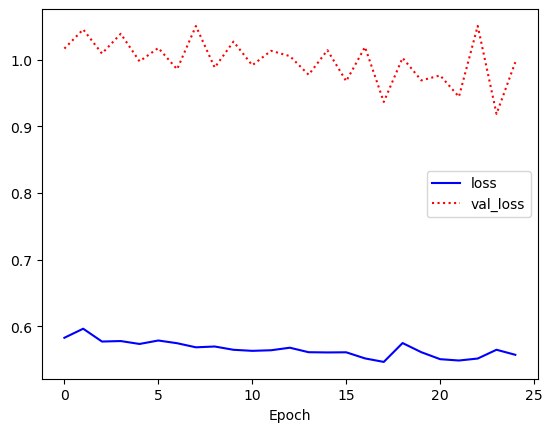

In [84]:
# (5) 회귀 모델 학습 결과 시각화
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()





In [86]:
# (6) 회귀 모델 평가
#    위의 모델 학습 (fit)을 다시 실행하면 결과가 다르게 나온다

model.evaluate(test_X, test_Y)





4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5895 


0.6747225522994995

[ 결과 ]  
 
 테스트 데이타의 손실은 0.6619248951182646 나온다.
 
 그러나 위 훈련 데이타 손실률 loss: 0.5619이다.
 
 위의 훈련 데이타 결과에서 
         Epoch 25/25
        303/303 [==============================] - 0s 184us/sample - loss: 0.5619 - val_loss: 0.9796

In [90]:
# (7) 실제 주택 가격과 예측 주택 가격 시각화
#    실제 주택 가격 (test_Y)에 대해 예측 주책 가격(pred_Y)는 대각선에 모든 점이 위치하는 이상적인 모습과 거리가 있어 보인다.

import matplotlib.pyplot as plt













In [92]:
print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


In [94]:
# (8) 집값 요인(x_values의 속성)에 따라  집값(예측값) 확인

# x_values = ([-0.47482083, -0.48335641, -0.42698208, -0.48335641, -0.47963044, -0.44081941,
#   0.15172056, -0.45581402, -0.45565404,  1.64280094, -0.33791894,  2.26541184,
#  -0.35370929],)

import numpy as np
x_values = np.array(([[
    -0.47482083, -0.48335641, -0.42698208, -0.48335641, -0.47963044, -0.44081941,
  0.15172056, -0.45581402, -0.45565404,  1.64280094, -0.33791894,  2.26541184,
 -0.35370929
]]))

y_pred = model.predict(x_values)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[-0.2321145]], dtype=float32)

가상으로 집값 예측


<table>
    <tr><th>속성</th><th>설명</th><th>정규화된속성값</th></tr>
    <tr><td>CRIM</td><td>범죄율</td><td>-0.47482083</td></tr>
    <tr><td>ZN</td><td>25000 평방피트당 주거지역의 비율</td><td>-0.48335641</td></tr>
    <tr><td>INDUS</td><td>비소매 상업지구 비율 (단위:에이커)</td><td>-0.42698208</td></tr>
    <tr><td>CHAS</td><td>찰스강에 인접하면 1, 그렇지 않으면 0</td><td>-0.48335641</td></tr>
    <tr><td>NOX</td><td>일산화질소 농도(단위: 0.1ppm)</td><td>-0.47963044</td></tr>
    <tr><td>RM</td><td>주택당 방의 수</td><td>-0.44081941</td></tr>
    <tr><td>AGE</td><td>1940년 이전에 건설된 주택의 비율</td><td>0.15172056</td></tr>
    <tr><td>DIS</td><td>5개의 보스턴 직업고용센터와의 거리 (가중평균)</td><td>-0.45581402</td></tr>
    <tr><td>RAD</td><td>고속도로 접근성</td><td>-0.45565404</td></tr>
    <tr><td>TAX</td><td>재산세율</td><td>1.64280094</td></tr>
    <tr><td>PTRATIO</td><td>학생교사비율</td><td>-0.33791894</td></tr>
    <tr><td>B</td><td>흑인비율</td><td>2.26541184</td></tr>
    <tr><td>LSTAT</td><td>하위계층비율</td><td>0.35370929</td></tr>
    <tr><td>MEDV</td><td>타운의 주택 가격 중앙값 (단위:1000달러)</td><td>??????</td></tr>
<table>    